### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

 

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс.

 

3. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.

 

4. Выполните стандартизацию признаков набора данных.

 

5. Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

 

6. Визуализируйте набора данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

 

7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%.

 

8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.

 

9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.

 

10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.

# Вариант 7 

Forest Fires Data Set 

Название файла: forestfires.csv 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Forest+Fires 

Класс: month (столбец No 3) 

Метод отбора признаков – одномерный отбор признаков (SelectKBest) 

Модели классификации: 

-       наивный байесовский классификатор 

-       классификатор логистической регрессии   

-       классификатор логистической регрессии с полиномиальной зависимостью (degree=2) 

Кривая для визуализации - PR-кривая 

 

# 1. открыть базу данных и прочитать значения

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162)

In [2]:
forest_fires['data'].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [3]:
forest_fires['data']['features']

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [4]:
forest_fires['data']['features']['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [5]:
data = forest_fires['data']['features']

# 2. объединение классов

/tmp/ipykernel_40155/963419700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[KLASS] = data[KLASS].apply(lambda x: klassOrd.index(x))


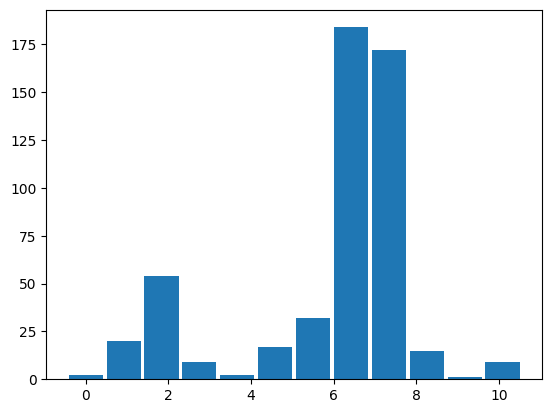

In [6]:
KLASS = 'month'

klassOrd = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
data[KLASS] = data[KLASS].apply(lambda x: klassOrd.index(x))

import matplotlib.pyplot as plt
counts, edges, bars = plt.hist(data[KLASS], bins=len(klassOrd), rwidth=0.9, align='left')
# for b in bars:
#     plt.bar_label(b)

In [7]:
import random
import collections
hist = collections.Counter(data[KLASS])

best_score = float('inf')
best_yes = []
best_no = []
for _ in range(100000):
    yes = []
    no = []
    for k, v in hist.items():
        if random.random() < 0.5:
            yes.append(k)
        else:
            no.append(k)
        
    score = sum(hist[k] for k in yes) - sum(hist[k] for k in no)

    if abs(score) < abs(best_score):
        print(score)
        best_score = score
        best_yes = yes
        best_no = no

yes = best_yes
no = best_no
print(sum(hist[k] for k in yes), sum(hist[k] for k in no))

117
-23
-15
-11
-7
-3
-1
258 259


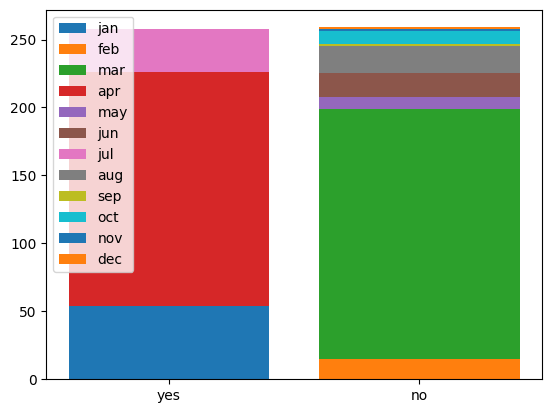

In [8]:
import numpy as np

yes_data = []
no_data = []
for k, v in hist.items():
    if k in yes:
        yes_data.append(v)
        no_data.append(0)
    else:
        no_data.append(v)
        yes_data.append(0)

ax = plt.axes()
bottom = np.zeros(2)
for k, y, n in zip(klassOrd, yes_data, no_data):
    if y:
        ax.bar('yes', y, bottom=bottom[0], label=k)
    else:
        ax.bar('no', n, bottom=bottom[1], label=k)
    bottom += np.array([y, n])
ax.legend()

In [9]:
data['klass'] = data[KLASS].apply(lambda x: 1 if x in yes else 0)

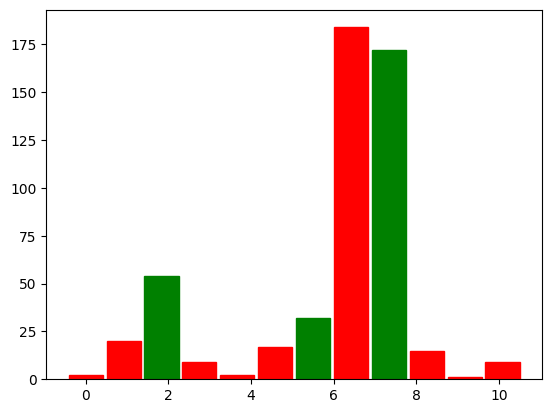

In [10]:
import matplotlib.pyplot as plt
counts, edges, bars = plt.hist(data[KLASS], bins=len(klassOrd), rwidth=0.9, align='left')
for k, b in zip(klassOrd, bars):
    k = klassOrd.index(k)
    if k in yes:
        b.set_color('green')
    else:
        b.set_color('red')

# 3. удалить текстовые признаки

In [11]:
del data['month']
del data['day']
data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,klass
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0


# 4. стандартизировать числовые признаки

In [12]:
klassData = data['klass']
data = (data - data.mean()) / data.std()
del data['klass']
data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.007337,0.569309,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197
1,1.007337,-0.243765,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197
2,1.007337,-0.243765,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197
3,1.439531,1.382383,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572
4,1.439531,1.382383,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197
...,...,...,...,...,...,...,...,...,...,...
512,-0.289244,-1.056839,-1.638496,-0.845829,0.474309,-1.561947,1.534597,-0.753070,-0.735411,-0.073197
513,-1.153631,-0.243765,-1.638496,-0.845829,0.474309,-1.561947,0.518517,1.637006,0.994835,-0.073197
514,1.007337,-0.243765,-1.638496,-0.845829,0.474309,-1.561947,0.397965,1.575722,1.497164,-0.073197
515,-1.585825,-0.243765,0.680298,0.548471,0.269122,0.499693,1.155720,-0.140230,-0.009824,-0.073197


# 5. отбор признаков

In [13]:
for f in data.columns:
    if data[f].nunique() < 10:
        data = data.drop(f, axis=1)

In [14]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k=2)
skb.fit(data, klassData)
feat1, feat2 = skb.get_feature_names_out()
print(feat1, feat2)

DMC ISI


# 6. визуализация

Text(0.5, 1.0, 'forest_fires')

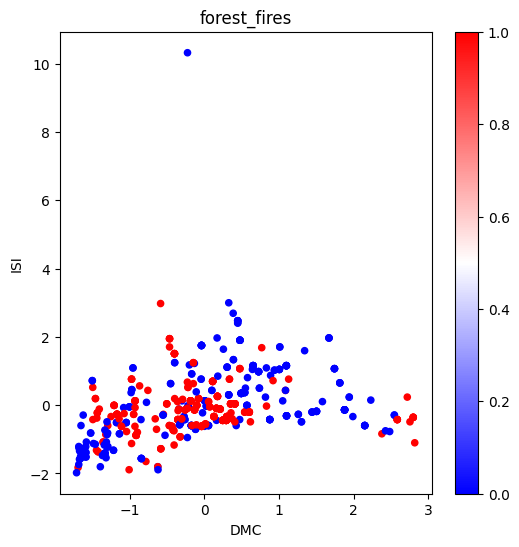

In [15]:
data.plot.scatter(feat1, feat2, c=klassData, cmap='bwr', figsize=(6, 6))
plt.title('forest_fires')

# 7. модели классификации

In [16]:
from sklearn.model_selection import train_test_split
data['klass'] = klassData
train, test = train_test_split(data, test_size=0.3)
test

,FFMC,DMC,DC,ISI,temp,RH,wind,klass
234,0.336102,0.159691,0.509783,-0.092481,-0.204795,-1.182058,-0.512154,1
445,0.607835,-0.983229,-1.802906,0.368098,-0.273682,2.188562,0.269248,0
202,-1.221838,-1.595284,-2.079445,-1.518083,-1.737527,1.453154,-1.014483,0
367,0.082484,0.334564,1.064877,0.762881,-0.428677,-1.059490,-0.233082,1
74,0.481026,0.473526,0.669015,1.069933,1.500154,-0.875638,-1.516813,1
...,...,...,...,...,...,...,...,...
447,0.499142,-1.461007,-2.094764,0.192640,-1.720305,-0.569218,2.222751,1
241,-1.384878,-1.367325,-1.864986,-1.474218,-0.377012,-1.488478,-0.512154,0
499,0.988263,1.096511,0.496883,1.157663,1.448489,1.146734,0.492505,0
397,0.173062,1.099634,0.262269,-0.311804,0.931838,-0.691786,-0.233082,0


In [17]:
#train_X = train[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind']]
train_X = train[[feat1, feat2]]
train_y = train['klass']
#test_X = test[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'wind']]
test_X = test[[feat1, feat2]]
test_y = test['klass']

In [18]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(train_X, train_y)

from sklearn.metrics import accuracy_score
print('Train accuracy: ', accuracy_score(train_y, model_naive_bayes.predict(train_X)))
print('Test  accuracy: ', accuracy_score(test_y, model_naive_bayes.predict(test_X)))

Train accuracy:  0.6952908587257618
Test  accuracy:  0.7051282051282052


In [19]:
# logistic regression classifier
from sklearn.linear_model import LogisticRegression
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(train_X, train_y)

print('Train accuracy: ', accuracy_score(train_y, model_logistic_regression.predict(train_X)))
print('Test  accuracy: ', accuracy_score(test_y, model_logistic_regression.predict(test_X)))

Train accuracy:  0.5457063711911357
Test  accuracy:  0.6025641025641025


In [20]:
# logistic regression classifier with polynomial degree=2

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
train_X_poly = poly.fit_transform(train_X)
test_X_poly = poly.transform(test_X)

model_logistic_regression_poly = LogisticRegression()
model_logistic_regression_poly.fit(train_X_poly, train_y)

print('Train accuracy: ', accuracy_score(train_y, model_logistic_regression_poly.predict(train_X_poly)))
print('Test  accuracy: ', accuracy_score(test_y, model_logistic_regression_poly.predict(test_X_poly)))

Train accuracy:  0.7340720221606648
Test  accuracy:  0.7243589743589743


# 8. границы принятия решений

/home/danya/.local/share/virtualenvs/rudn-year4-data-mining-Ym7BTVQk/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Naive Bayes')

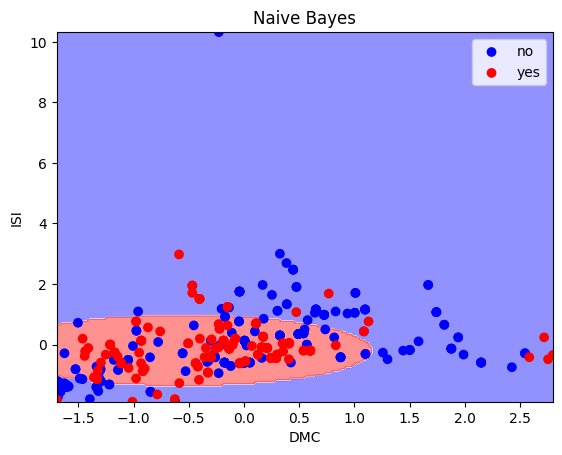

In [21]:
from sklearn.inspection import DecisionBoundaryDisplay

xx0, xx1 = np.meshgrid(np.linspace(min(train_X[feat1]), max(train_X[feat1]), 200), np.linspace(min(train_X[feat2]), max(train_X[feat2]), 200))
grid = np.vstack([xx0.ravel(), xx1.ravel()]).T
y_pred = model_naive_bayes.predict(grid).reshape(xx0.shape)

disp = DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=y_pred, xlabel=feat1, ylabel=feat2)
disp.plot(alpha=0.5, cmap='bwr')

disp.ax_.scatter(train_X[train_y==0][feat1], train_X[train_y==0][feat2], c=[0 for _ in range(len(train_X[train_y==0]))], label='no', cmap='bwr', vmin=0, vmax=1)
disp.ax_.scatter(train_X[train_y==1][feat1], train_X[train_y==1][feat2], c=[1 for _ in range(len(train_X[train_y==1]))], label='yes', cmap='bwr', vmin=0, vmax=1)


disp.ax_.legend()
disp.ax_.set_title('Naive Bayes')

/home/danya/.local/share/virtualenvs/rudn-year4-data-mining-Ym7BTVQk/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression')

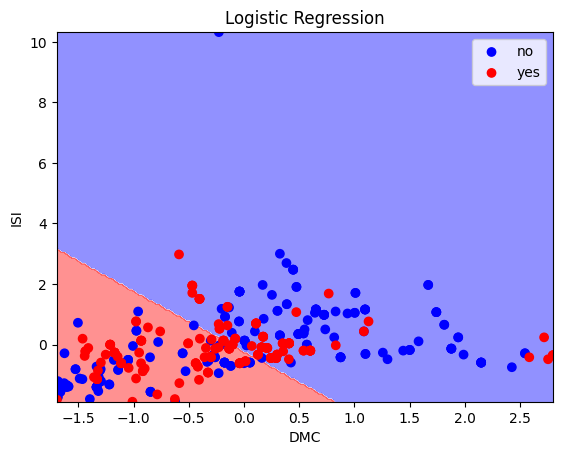

In [22]:
from sklearn.inspection import DecisionBoundaryDisplay

xx0, xx1 = np.meshgrid(np.linspace(min(train_X[feat1]), max(train_X[feat1]), 200), np.linspace(min(train_X[feat2]), max(train_X[feat2]), 200))
grid = np.vstack([xx0.ravel(), xx1.ravel()]).T
y_pred = model_logistic_regression.predict(grid).reshape(xx0.shape)

disp = DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=y_pred, xlabel=feat1, ylabel=feat2)
disp.plot(alpha=0.5, cmap='bwr')

disp.ax_.scatter(train_X[train_y==0][feat1], train_X[train_y==0][feat2], c=[0 for _ in range(len(train_X[train_y==0]))], label='no', cmap='bwr', vmin=0, vmax=1)
disp.ax_.scatter(train_X[train_y==1][feat1], train_X[train_y==1][feat2], c=[1 for _ in range(len(train_X[train_y==1]))], label='yes', cmap='bwr', vmin=0, vmax=1)


disp.ax_.legend()
disp.ax_.set_title('Logistic Regression')

/home/danya/.local/share/virtualenvs/rudn-year4-data-mining-Ym7BTVQk/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression (poly features)')

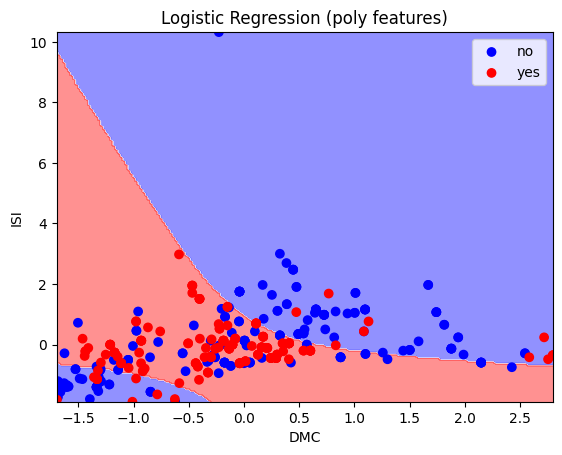

In [23]:
from sklearn.inspection import DecisionBoundaryDisplay

xx0, xx1 = np.meshgrid(np.linspace(min(train_X[feat1]), max(train_X[feat1]), 200), np.linspace(min(train_X[feat2]), max(train_X[feat2]), 200))
grid = np.vstack([xx0.ravel(), xx1.ravel()]).T
y_pred = model_logistic_regression_poly.predict(poly.transform(grid)).reshape(xx0.shape)

disp = DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=y_pred, xlabel=feat1, ylabel=feat2)
disp.plot(alpha=0.5, cmap='bwr')

disp.ax_.scatter(train_X[train_y==0][feat1], train_X[train_y==0][feat2], c=[0 for _ in range(len(train_X[train_y==0]))], label='no', cmap='bwr', vmin=0, vmax=1)
disp.ax_.scatter(train_X[train_y==1][feat1], train_X[train_y==1][feat2], c=[1 for _ in range(len(train_X[train_y==1]))], label='yes', cmap='bwr', vmin=0, vmax=1)


disp.ax_.legend()
disp.ax_.set_title('Logistic Regression (poly features)')

# 9. PR-кривые

In [24]:
from sklearn.metrics import precision_recall_curve
nb_prec, nb_recall, nb_thresh = precision_recall_curve(test_y, model_naive_bayes.predict_proba(test_X)[:, 1])
lr_prec, lr_recall, lr_thresh = precision_recall_curve(test_y, model_logistic_regression.predict_proba(test_X)[:, 1])
lr_poly_prec, lr_poly_recall, lr_poly_thresh = precision_recall_curve(test_y, model_logistic_regression_poly.predict(poly.transform(test_X)))

Text(0.5, 1.0, 'Precision-Recall curve')

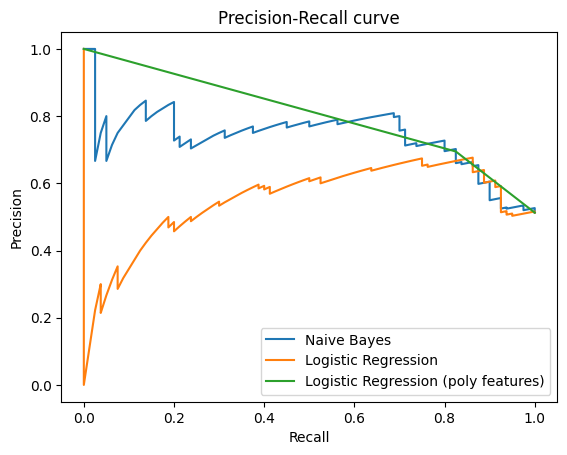

In [25]:
ax = plt.gca()
ax.plot(nb_recall, nb_prec, label='Naive Bayes')
ax.plot(lr_recall, lr_prec, label='Logistic Regression')
ax.plot(lr_poly_recall, lr_poly_prec, label='Logistic Regression (poly features)')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend()
ax.set_title('Precision-Recall curve')

# 10. лучший классификатор

In [26]:
# calculate area under the curve for each model
from sklearn.metrics import auc
scores = [
    (auc(nb_recall, nb_prec), "Naive Bayes"),
    (auc(lr_recall, lr_prec), "Logistic Regression"),
    (auc(lr_poly_recall, lr_poly_prec), "Logistic Regression (poly features)")
]
scores.sort(reverse=True)

print("Scores:")
for i, score in enumerate(scores):
    print(f"{i+1}. {score[1]}: {score[0]}")

Scores:
1. Logistic Regression (poly features): 0.8047402159244265
2. Naive Bayes: 0.736942956965053
3. Logistic Regression: 0.5452144838210244
